In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
from IPython.display import Markdown,display,HTML

"""
电商数据分析项目 共三个部分，1.数据理解，包含字段说明、数据清洗, 数据清洗包含数据类型， 空值处理，重复样本处理，异常值，和衍生字段
                    2.产品维度包括：销售趋势，各个品牌占比、品牌客单价、访客数、转发率
                    3.用户维度中描述统计包括用户量、消费金额、订单量，  用户质量周期分层中：新老客户消费占比，用户生命周期，用户消费周期， RFM模型
"""

In [3]:
def display_table(data):
    df=pd.DataFrame(data)
    display(HTML(df.to_html(index=False)))

In [4]:
df = pd.read_csv('data/kz.csv',dtype={'product_id':'str','category_id':'str','user_id':'str'})

In [5]:
display_table(df.head())

event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648170900,electronics.tablet,samsung,162.01,1515915625441993984
2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648170900,electronics.tablet,samsung,162.01,1515915625441993984
2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997728,electronics.audio.headphone,huawei,77.52,1515915625447879434
2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997728,electronics.audio.headphone,huawei,77.52,1515915625447879434
2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840086,NaN,karcher,217.57,1515915625443148002


In [6]:
###先倒入数据  清洗，确定人场货维度

print(df.head())
print(df.info())
display_table(df.describe())

                event_time             order_id           product_id  \
0  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1  2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3  2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4  2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   

           category_id                category_code    brand   price  \
0  2268105426648170900           electronics.tablet  samsung  162.01   
1  2268105426648170900           electronics.tablet  samsung  162.01   
2  2268105430162997728  electronics.audio.headphone   huawei   77.52   
3  2268105430162997728  electronics.audio.headphone   huawei   77.52   
4  2268105471367840086                          NaN  karcher  217.57   

               user_id  
0  1515915625441993984  
1  1515915625441993984  
2  1515915625447879434  
3  1515915625447879434  
4  151591

order_id,price
2.633521e+06,2.201567e+06
2.361783e+18,1.540932e+02
1.716538e+16,2.419421e+02
2.294360e+18,0.000000e+00
2.348807e+18,1.456000e+01
2.353254e+18,5.553000e+01
2.383131e+18,1.967400e+02
2.388441e+18,5.092590e+04


In [7]:
###################################数据清洗部分############################################

In [8]:
#1.判断完全重复数据， 并删除
print(df.duplicated().sum())
df=df.drop_duplicates()

675


In [9]:
#2.判断缺失值
print(df.isnull().sum())

event_time             0
order_id               0
product_id             0
category_id       431953
category_code     612053
brand             505965
price             431953
user_id          2069351
dtype: int64


In [14]:
# ... existing code ...

###查看空值占比########
print('###查看空值占比########')
# 计算每个字段的空值比例
null_ratio = df.isnull().mean() * 100    #####mean 计算True值数的平均数， 平均数=A/B的形式。 空值占比=mean（TRUE/总数） 

# 格式化输出
null_stats = pd.DataFrame({
    '字段名': null_ratio.index,
    '空值数量': df.isnull().sum(),
    '总记录数': len(df),
    '空值占比(%)': null_ratio.round(2)
})
display(HTML(null_stats.to_html(index=False)))

###查看空值占比########


,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2633516,False,False,False,False,False,False,False,False
2633517,False,False,False,False,False,False,False,False
2633518,False,False,False,False,False,False,False,False
2633519,False,False,False,False,True,False,False,False


In [15]:
"""发现50%的样本有缺失，直接删除不妥
   判断:源数据很脏， 或者故意填充的空值null"""

'发现50%的样本有缺失，直接删除不妥\n   判断:源数据很脏， 或者故意填充的空值null'

In [22]:
"""user_id为空，价格，类型也是空, 可能是访问没登陆"""
df[df.user_id.isnull()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_type
1812,2020-05-02 11:12:20 UTC,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN,visit
3633,2020-05-06 07:37:55 UTC,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN,visit
3918,2020-05-06 22:36:13 UTC,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN,visit
6015,2020-05-10 09:41:54 UTC,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN,visit
7802,2020-05-13 03:09:39 UTC,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN,visit
...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56 UTC,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN,visit
2632434,2020-11-19 05:38:31 UTC,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN,visit
2632437,2020-11-19 11:21:22 UTC,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN,visit
2632472,2020-11-19 09:54:22 UTC,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN,visit


In [23]:

"""品牌为空，但却有订单id userid 价格等实际产生了销量，
所以品牌不是用户没买，而是网站原因或标注不全等"""
df[df.brand.isnull()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_type
18,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2268105635507732512,NaN,NaN,6.94,1515915625447779982,purchase
61,2020-04-29 12:42:12 UTC,2298009757589438761,1515966223509104974,2268105406356128718,computers.peripherals.keyboard,NaN,12.71,1515915625451999752,purchase
64,2020-04-29 12:42:12 UTC,2298009757589438761,1515966223509104402,2268105409317306388,NaN,NaN,300.90,1515915625451999752,purchase
69,2020-04-29 12:51:50 UTC,2298014603872830244,1515966223509089420,2268105406549066706,computers.peripherals.mouse,NaN,5.07,1515915625452183601,purchase
82,2020-04-29 13:17:16 UTC,2298027408663511168,1515966223510206441,2268105446034244402,NaN,NaN,2.52,1515915625513724970,purchase
...,...,...,...,...,...,...,...,...,...
2633316,2020-11-21 06:01:36 UTC,2388440981134693769,1515966223532411322,2268105409317306388,NaN,NaN,400.44,1515915625444844659,purchase
2633318,2020-11-21 06:03:17 UTC,2388440981134693771,2333247274437574677,2268105404862956464,furniture.kitchen.table,NaN,27.75,1515915625449306918,purchase
2633361,2020-11-21 06:48:38 UTC,2388440981134693809,1515966223509266682,2268105440455819964,NaN,NaN,49.75,1515915625514874517,purchase
2633396,2020-11-21 07:34:31 UTC,2388440981134693841,1515966223510196871,2268105428854374854,electronics.clocks,NaN,6.92,1515915625514876070,purchase


In [17]:
"""空值采用填充值的方式，品牌用others填充。  金额price=0，用户ID=unkown"""
"""新增时间类型列 访问还是购买"""

##新增类型type列默认全是'visit'
##f.loc[..., 'event_type']：选择满足条件的行，并更新它们的 event_type 列
df['event_type']=str('visit')
df.loc[df['price'].notna(),'event_type']=str('purchase')


In [19]:
df.fillna({'brand':'others','user_id':'unkown','price':0})

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_type
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648170900,electronics.tablet,samsung,162.01,1515915625441993984,purchase
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997728,electronics.audio.headphone,huawei,77.52,1515915625447879434,purchase
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840086,NaN,karcher,217.57,1515915625443148002,purchase
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2268105442636858090,furniture.kitchen.table,maestro,39.33,1515915625450382722,purchase
6,2020-04-26 09:33:47 UTC,2295740594749702229,1515966223509104892,2268105428166508982,electronics.smartphone,apple,1387.01,1515915625448766480,purchase
...,...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2268105428166508982,electronics.smartphone,oppo,138.87,1515915625514888605,purchase
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2268105428166508982,electronics.smartphone,apple,418.96,1515915625514891148,purchase
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2268105402447037312,appliances.personal.scales,vitek,12.48,1515915625514834281,purchase
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2268105440371933882,NaN,moulinex,41.64,1515915625514834281,purchase


In [34]:
########数据时间序列###############################################
###把时间改为通用datetime64类型， 
df['event_time']=pd.to_datetime(df.event_time)
df['day']=df.event_time.values.astype('datetime64[D]')
df['Month']=df.event_time.values.astype('datetime64[M]')

In [35]:
df=df[df.Month>='2020-01-01']
df.reset_index(drop=True,inplace=True)####在按时间筛选df 后 对索引index重置丢弃旧索引，inplace=True表示直接修改原DataFrame

In [36]:
np.set_printoptions(suppress=True)  ######抑制显示科学技术法
pd.set_option('display.float_format',lambda x : '%.2f' % x) #### 将显示浮点后两位小数

In [37]:
df.describe()

,order_id,price,day,Month
count,2613215.00,2185340.00,2613215,2613215
mean,2361898823701765632.00,154.19,2020-06-01 16:24:22,2020-05-18 03:04:09
min,2294359932054536960.00,0.00,2020-01-05 00:00:00,2020-01-01 00:00:00
25%,2348808120123261952.00,14.56,2020-03-06 00:00:00,2020-03-01 00:00:00
50%,2353254599067960320.00,55.53,2020-06-09 00:00:00,2020-06-01 00:00:00
75%,2383131603690849280.00,196.74,2020-08-24 00:00:00,2020-08-01 00:00:00
max,2388440981134693888.00,50925.90,2020-11-21 00:00:00,2020-11-01 00:00:00
std,17170329471123940.00,242.02,NaN,NaN


In [38]:
df.price.skew()######统计中价格的偏执系数  8.4数据严重偏斜

8.402113457700416

In [39]:
#####################################产品角度分析#############################################
df.brand.unique()

#len(df.brand.unique())=22956

array(['samsung', 'huawei', 'karcher', ..., 'fischer', 'benq', 'zevs'],
      dtype=object)

In [40]:
#有近2.3万个品牌  ，只对销售总额top10的品牌分析
brand_index=df.groupby('brand').price.sum().sort_values(ascending=False)[:10].index.values
brand_index
##选出品牌top10

array(['samsung', 'apple', 'lg', 'bosch', 'huawei', 'asus', 'lenovo',
       'ava', 'beko', 'oppo'], dtype=object)

In [41]:
df_temp=df[df.brand.isin(brand_index)]  #########筛选上述top10品牌的数据df_temp
df_temp.reset_index(drop=True,inplace=True)
df_temp

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_type,day,Month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648170900,electronics.tablet,samsung,162.01,1515915625441993984,purchase,2020-04-24,2020-04-01
1,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997728,electronics.audio.headphone,huawei,77.52,1515915625447879434,purchase,2020-04-24,2020-04-01
2,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2268105428166508982,electronics.smartphone,apple,1387.01,1515915625448766480,purchase,2020-04-26,2020-04-01
3,2020-04-26 14:55:26+00:00,2295902490203259134,2273948311742316796,2268105393848713950,appliances.kitchen.refrigerators,lg,462.94,1515915625450561165,purchase,2020-04-26,2020-04-01
4,2020-04-27 07:24:51+00:00,2296400480990920715,2273948308663698152,2374498914000592280,electronics.video.tv,samsung,416.64,1515915625450899340,purchase,2020-04-27,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...
801698,2020-11-21 10:05:04+00:00,2388440981134693938,1515966223509088509,2268105428166508982,electronics.smartphone,apple,925.67,1515915625514847056,purchase,2020-11-21,2020-11-01
801699,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223519279912,2374498914000592284,electronics.video.tv,samsung,1736.09,1515915625513809944,purchase,2020-11-21,2020-11-01
801700,2020-11-21 10:08:54+00:00,2388440981134693941,1515966223509088622,2374498914000592280,electronics.video.tv,lg,370.35,1515915625513809944,purchase,2020-11-21,2020-11-01
801701,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2268105428166508982,electronics.smartphone,oppo,138.87,1515915625514888605,purchase,2020-11-21,2020-11-01


In [44]:
data=df_temp.groupby('brand').describe()
data.loc[:,('price','CV')]=data['price']['std']/data['price']['mean'] ####归一化离散程度cv=方差/平均值
data

order_id                                                \
            count                   mean                    min   
brand                                                             
apple    74026.00 2365756083797480448.00 2295740594749702144.00   
asus     20524.00 2365983047320189952.00 2297016008231092480.00   
ava     117447.00 2361012997265224704.00 2297989017720849408.00   
beko     32003.00 2357552394433268736.00 2298117791544246784.00   
bosch    33728.00 2363745122119681536.00 2298241357954679296.00   
huawei   56649.00 2358088753263768576.00 2294444024058086144.00   
lenovo   19586.00 2366273491575261184.00 2298032794787382016.00   
lg       55321.00 2363332150656908288.00 2295902490203259136.00   
oppo     36073.00 2362523754051899392.00 2298517335901733632.00   
samsung 356346.00 2362779667065577472.00 2294359932054536960.00   

                                                                              \
                           25%                    50%                    75%   
brand                                                                          
apple   2348817931418207232.00 2358652217793184256.00 2388440981134417920.00   
asus    2348827946036232192.00 2361254068019528192.00 2386338283725521920.00   
ava     2348814665905078784.00 2353258433114800640.00 2378783205063917568.00   
beko    2348823917986054656.00 2353251749860475392.00 2357955589037884416.00   
bosch   2348819025062002688.00 2353271272474935808.00 2386030662734840320.00   
huawei  2348794841560776704.00 2353226179328081920.00 2357955246686208000.00   
lenovo  2348827005903962112.00 2359601120688472064.00 2388440981134377984.00   
lg      2348819609336939008.00 2353273901145915904.00 2384580846116929536.00   
oppo    2348812208604971520.00 2353252882171560448.00 2385305438825480704.00   
samsung 2348816249795903488.00 2353268222544838656.00 2383856150893298176.00   

                                                        price         ...  \
                           max                  std     count   mean  ...   
brand                                                                 ...   
apple   2388440981134693888.00 18276032439916356.00  74026.00 641.78  ...   
asus    2388440981134693888.00 17868762865967720.00  20524.00 516.77  ...   
ava     2388440981134693888.00 16676157792425318.00 117447.00  72.34  ...   
beko    2388440981134693888.00 13907489495314380.00  32003.00 263.79  ...   
bosch   2388440981134693888.00 17682673996661104.00  33728.00 326.88  ...   
huawei  2388440981134693888.00 15587438266352474.00  56649.00 187.87  ...   
lenovo  2388440981134693888.00 17930362712352812.00  19586.00 535.77  ...   
lg      2388440981134693888.00 17355253857046866.00  55321.00 469.77  ...   
oppo    2388440981134693888.00 17385425894097172.00  36073.00 201.20  ...   
samsung 2388440981134693888.00 17383572178161018.00 356346.00 251.24  ...   

         day   Month                                            \
         std   count                 mean                  min   
brand                                                            
apple    NaN   74026  2020-06-08 01:42:21  2020-01-01 00:00:00   
asus     NaN   20524  2020-06-12 02:32:23  2020-01-01 00:00:00   
ava      NaN  117447  2020-05-21 13:32:48  2020-01-01 00:00:00   
beko     NaN   32003  2020-05-16 14:51:08  2020-01-01 00:00:00   
bosch    NaN   33728  2020-05-30 10:32:43  2020-01-01 00:00:00   
huawei   NaN   56649  2020-04-26 21:38:20  2020-01-01 00:00:00   
lenovo   NaN   19586  2020-06-11 23:27:30  2020-01-01 00:00:00   
lg       NaN   55321  2020-05-27 23:38:12  2020-01-01 00:00:00   
oppo     NaN   36073  2020-05-19 06:31:17  2020-01-01 00:00:00   
samsung  NaN  356346  2020-05-25 02:46:29  2020-01-01 00:00:00   

                                                                        \
                         25%                  50%                  75%   
brand                                                                    
apple    2020

In [43]:
group_brand= df_temp.groupby(['brand','day']).price.sum()
group_brand.unstack()
###groupby[字段1，时间天数] 聚合总销售额,  然后unstack分堆 同时 .T转置 行列互换， 可以实现时间为x横轴，y为分组字段1的坐标图

brand,apple,asus,ava,beko,bosch,huawei,lenovo,lg,oppo,samsung
day,,,,,,,,,,
2020-01-05,167444.80,21956.67,23033.32,24121.77,17475.49,82698.98,28420.16,81710.60,27860.72,267942.17
2020-01-06,125342.46,27565.94,24200.75,18209.95,21355.61,79647.16,21911.38,85086.92,27572.46,240576.06
2020-01-07,163454.33,31876.92,33200.07,27859.95,28886.17,91493.03,26880.87,103888.83,38571.37,352099.48
2020-01-08,104558.79,19043.99,21053.60,15650.68,12604.73,72479.25,23519.80,47138.37,23018.70,234418.67
2020-01-09,104211.81,21079.67,17777.82,13669.15,19127.09,57299.86,22385.72,50183.61,20229.48,183030.22
...,...,...,...,...,...,...,...,...,...,...
2020-11-17,125908.76,16123.64,4065.92,2874.79,4657.27,3633.60,17894.88,8405.47,2314.64,44859.16
2020-11-18,170026.89,40025.76,26349.61,14442.87,45233.71,14623.94,55556.68,106211.03,33977.93,304733.98
2020-11-19,156553.53,39268.63,27888.03,14661.63,36324.80,12400.93,52393.75,97886.64,37880.40,293625.14


<Axes: xlabel='day'>

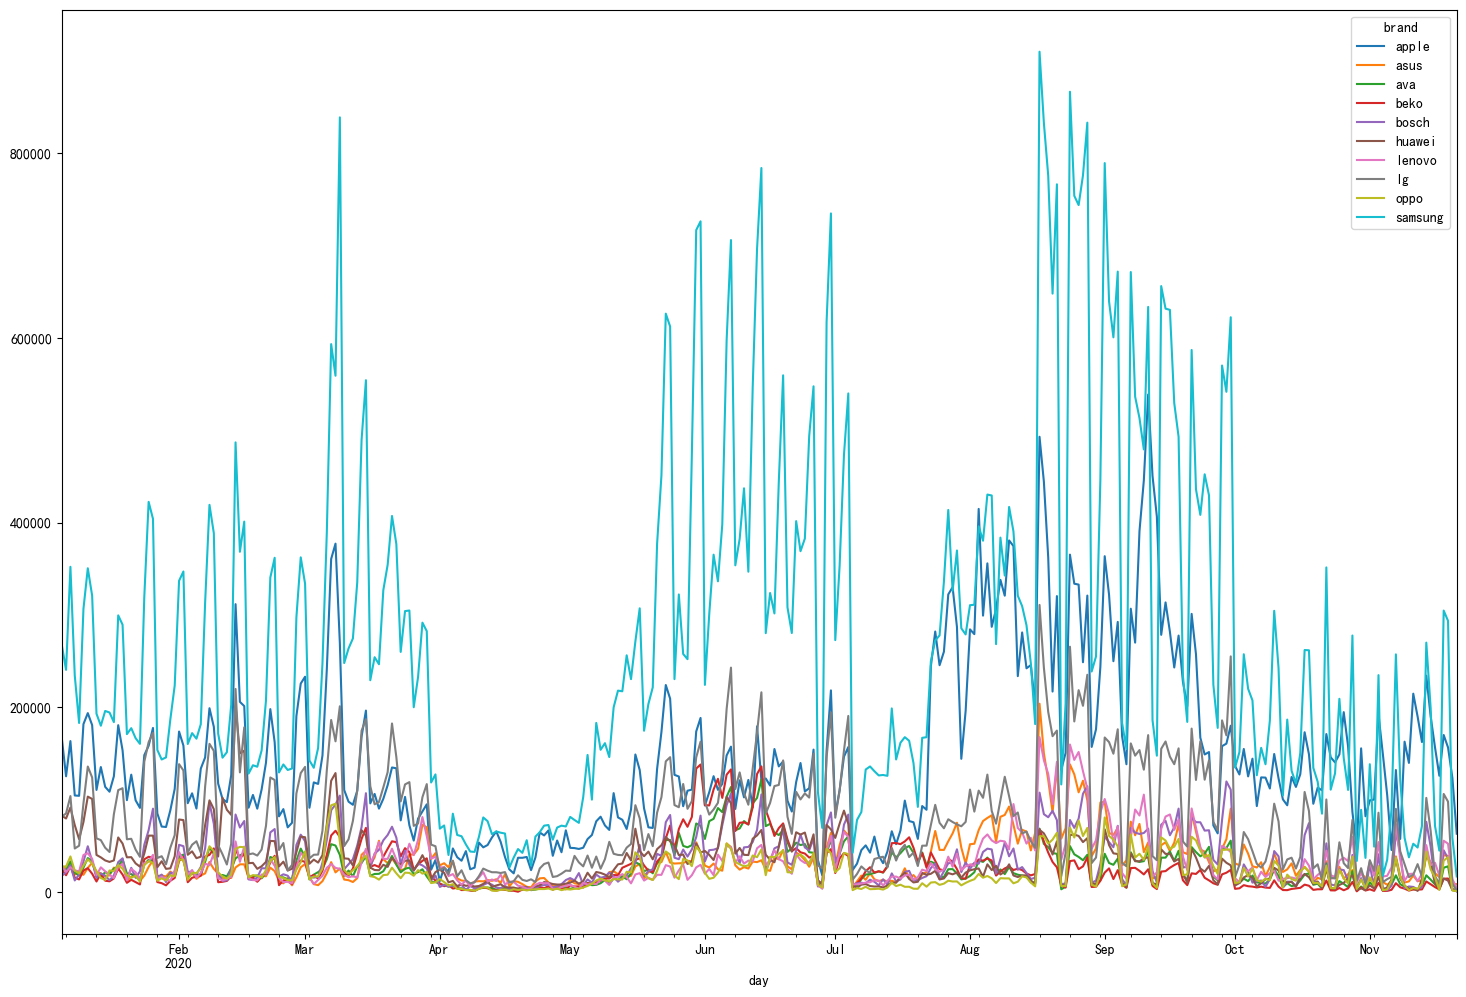

In [45]:
group_brand.unstack().T.plot(figsize=(18,12))
###groupby[字段1，时间天数] 聚合总销售额,  然后unstack分堆 同时 .T转置 行列互换， 可以实现时间为x横轴，y为分组字段1的坐标图

In [31]:
"""第一张成品图---销售图
六八九月为高峰期。 四月低谷期， 三星苹果占大头
"""

'第一张成品图---销售图\n六八九为高峰期。 四月低谷期， 三星苹果占大头\n'

'三星，苹果占近60% 看看其他品牌是否有挖掘潜力'

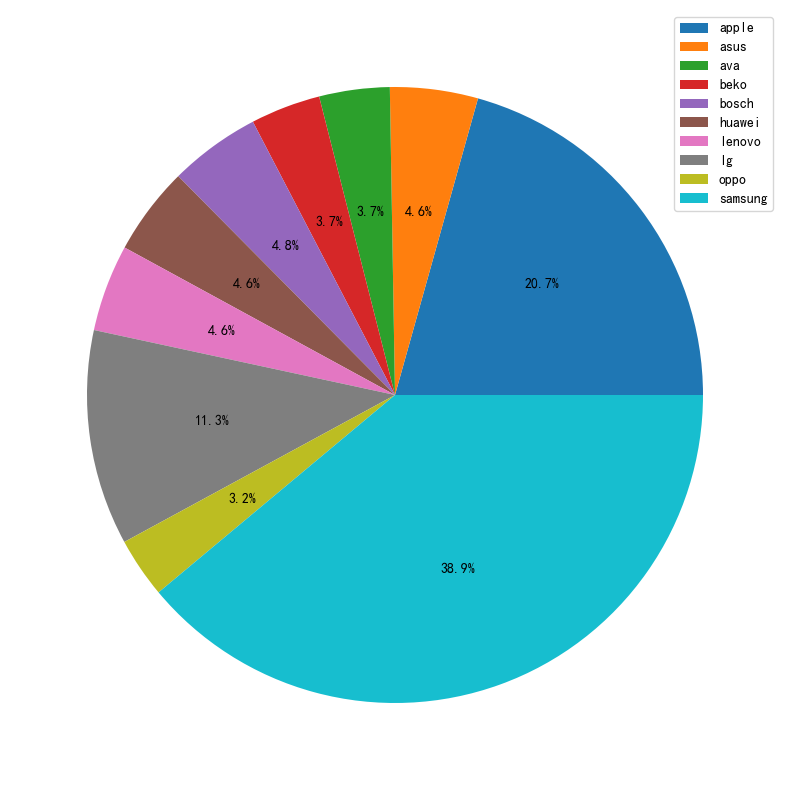

In [41]:
plt.figure(figsize=(10,10))    ########top10的数据
x=df_temp.groupby('brand').price.sum()
plt.pie(x,autopct='%.1f%%')
plt.legend(x.index)
"""三星，苹果占近60% 看看其他品牌是否有挖掘潜力"""

In [42]:
b_uv=df_temp[df_temp.event_type=='purchase'].groupby('brand').user_id.nunique()
#####nunique() 统计非空 去重字段的计数
b_uv

brand
apple      23635
asus        6487
ava        20755
beko        5939
bosch       6823
huawei      8090
lenovo      5908
lg         12016
oppo        5553
samsung    60112
Name: user_id, dtype: int64

In [43]:
uv=df_temp.groupby('brand').user_id.nunique()
uv

brand
apple      23635
asus        6487
ava        20755
beko        5939
bosch       6823
huawei      8090
lenovo      5908
lg         12016
oppo        5553
samsung    60112
Name: user_id, dtype: int64

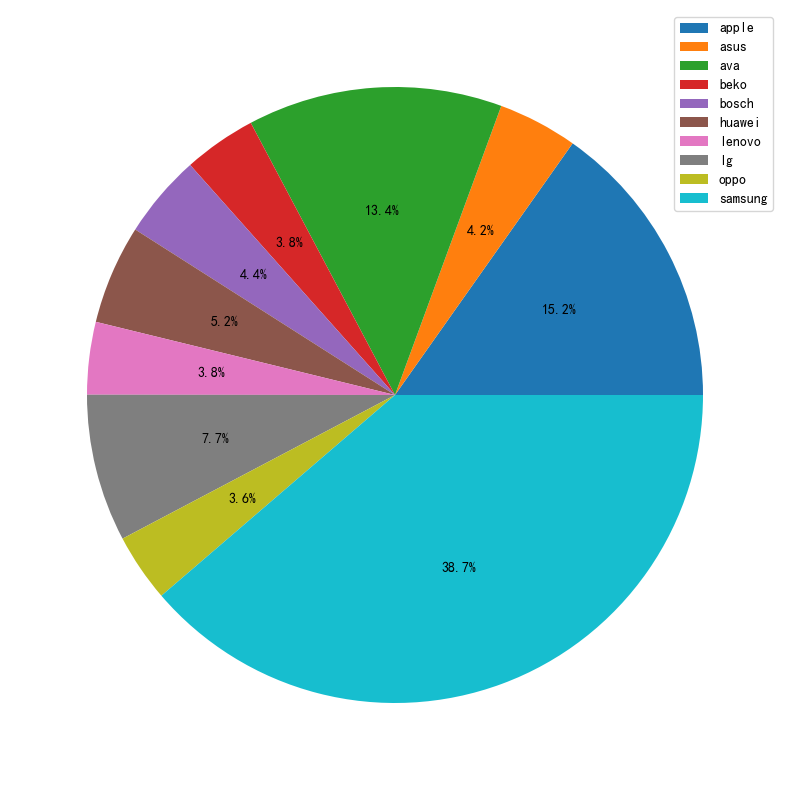

In [44]:
"""计算事件类型为购买的人 /访客总数= 转化率 
但两个数据完全一样：  其含义是  event_type：purchase购买的人=总人数         event_type：visit 对应 品牌brand=空
无法求每个产品的转化率， 而只能求整个网站的转化"""
########访客的量数据饼图###
plt.figure(figsize=(10,10))
plt.pie(b_uv,autopct='%.1f%%')
plt.legend(b_uv.index)

"""要两张图以前 三星还是最高占比，访问与销售量为1：1"""

In [45]:
"""要两张图以前 三星还是最高占比，访问与销售量为1：1  苹果以15%的访客带来了20%的销售额  苹果看似转化率较高"""

'要两张图以前 三星还是最高占比，访问与销售量为1：1  苹果以15%的访客带来了20%的销售额  苹果看似转化率较高'

In [46]:
(x/b_uv).sort_values(ascending=False).plot.barh()#######x/b_uv 是
(x/b_uv).sort_values(ascending=False)
"""前4 除了苹果外， LG，联想，asus在客单维度较为突出， 在上面销售额和访问量都占比不大的情况，  客单价远超 排第一的三星
个人猜测： 各个品牌的访问量uv 受几个原因:1、品牌的忠诚度 ，2、流量资源的倾斜程度，
       若品牌的转化率都差不多的情况下，  LG，联想，asus在高客单价的基础上 有更多的访问量uv 会带来更多的销售金额

SyntaxError: incomplete input (40468433.py, line 3)

In [ ]:
##########################################用户维度分析##################################

<Axes: title={'center': 'uv访问量'}, xlabel='day'>

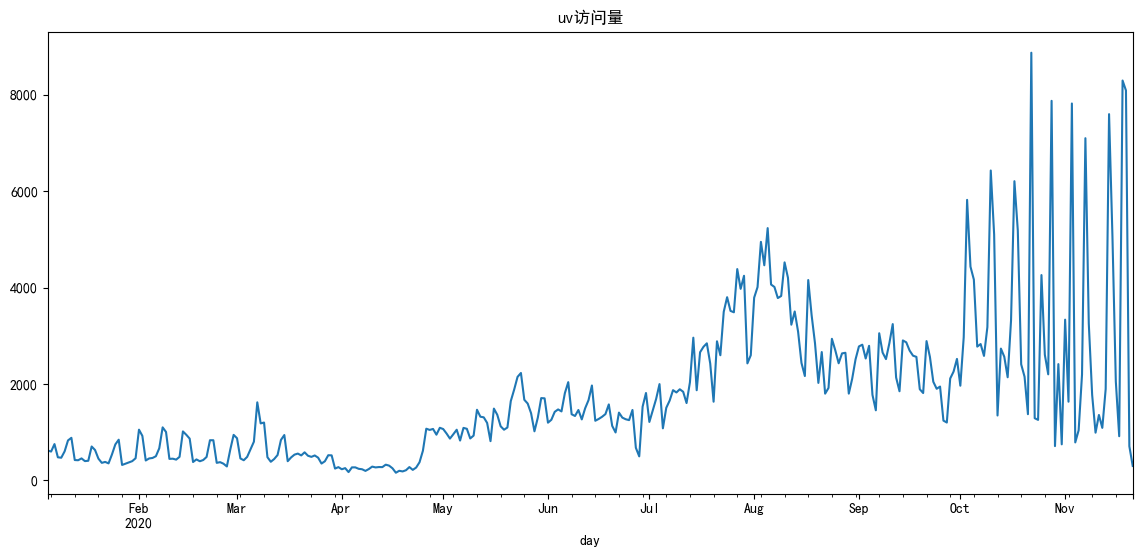

In [47]:
df.groupby('day').user_id.count()
df.groupby('day').user_id.count().plot(figsize=(14,6),title='uv访问量')

<Axes: title={'center': '付费用户数'}, xlabel='day'>

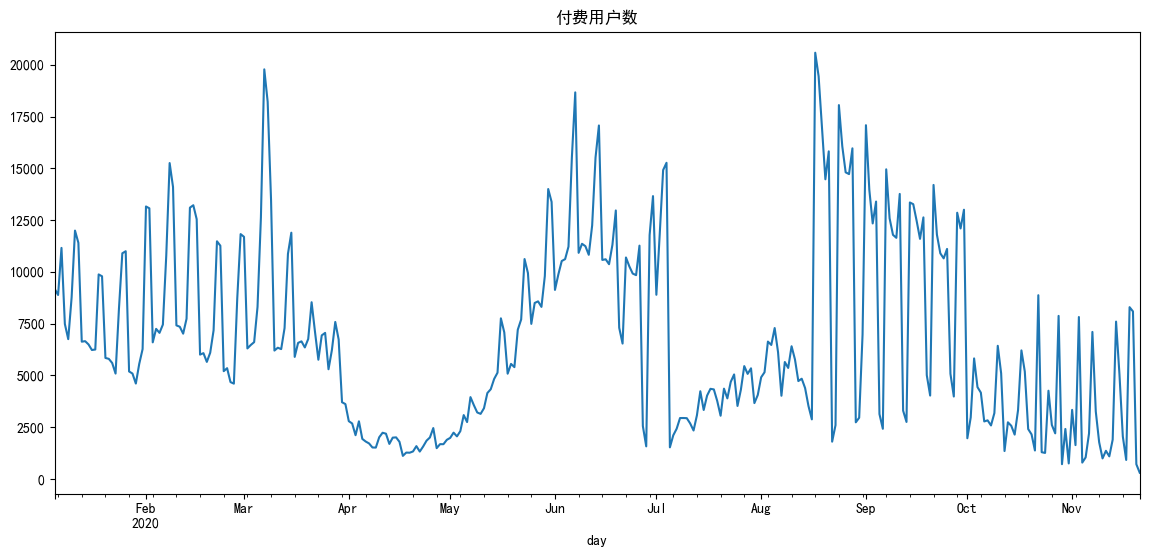

In [48]:
df[df.event_type=='purchase'].groupby('day').event_type.count().plot(figsize=(14,6),title='付费用户数')

<Axes: title={'center': '销售额'}, xlabel='day'>

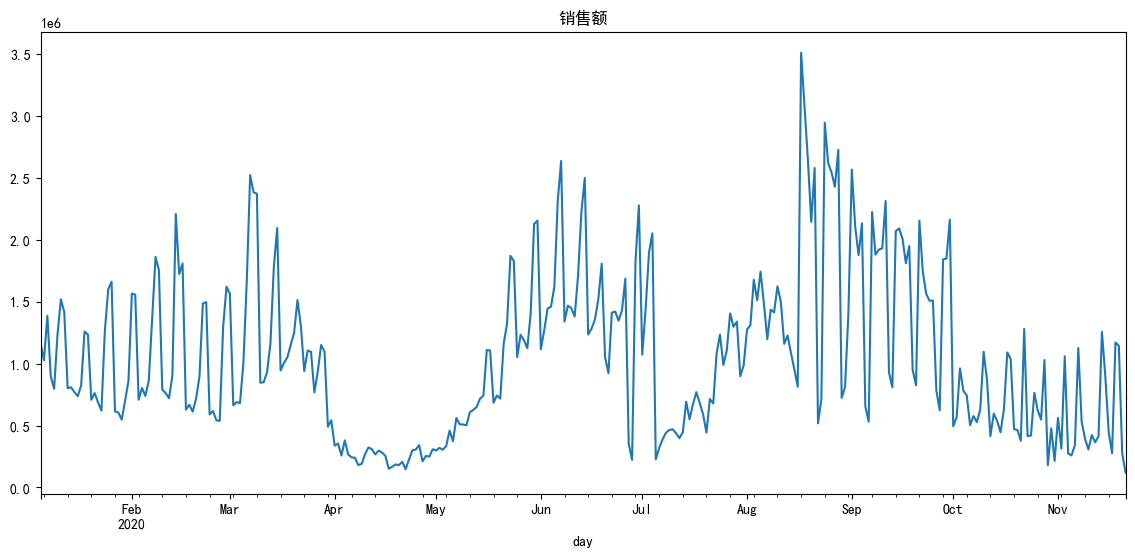

In [49]:
df.groupby('day').price.sum().plot(figsize=(14,6),title='销售额')

In [50]:
"""上面三图中，销售额和付费用户数 趋势基本一致，
四月最低，七九十 高峰"""

'上面三图中，销售额和付费用户数 趋势基本一致，\n四月最低，七九十 高峰'

In [51]:
####用数据透视表 pivots_table
pivots=df.pivot_table(index='Month',values=['user_id','price'],aggfunc={'user_id':'count','price':'sum'})
pivots

,price,user_id
Month,,
2020-01-01,26494398.53,14270
2020-02-01,31836933.60,17995
2020-03-01,37550969.39,18688
2020-04-01,7684247.18,11851
2020-05-01,28333869.08,40241
2020-06-01,45071088.95,41328
2020-07-01,26177541.28,76251
2020-08-01,52805886.48,99893
2020-09-01,49306572.41,70444


<Axes: ylabel='Month'>

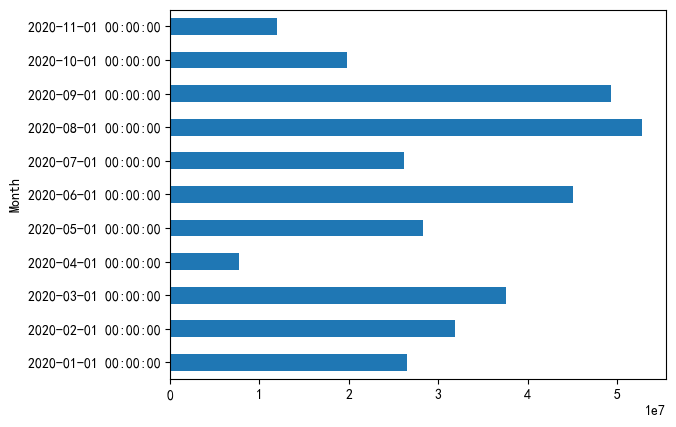

In [52]:
pivots.price.plot.barh()

<Axes: ylabel='Month'>

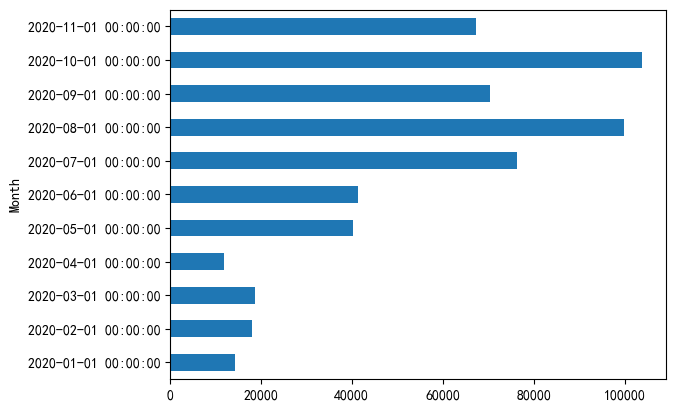

In [53]:
pivots.user_id.plot.barh()

In [54]:
"""4月份分最淡季， 8月份最旺，"""

'4月份分最淡季， 8月份最旺，'

In [48]:
df_puraches=df[df.event_type=='purchase']
df_puraches.reset_index(drop=True,inplace=True)
df_puraches#####销售额表

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,event_type,day,Month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2268105426648170900,electronics.tablet,samsung,162.01,1515915625441993984,purchase,2020-04-24,2020-04-01
1,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2268105430162997728,electronics.audio.headphone,huawei,77.52,1515915625447879434,purchase,2020-04-24,2020-04-01
2,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2268105471367840086,NaN,karcher,217.57,1515915625443148002,purchase,2020-04-24,2020-04-01
3,2020-04-26 08:45:57+00:00,2295716521449619559,1515966223509261697,2268105442636858090,furniture.kitchen.table,maestro,39.33,1515915625450382722,purchase,2020-04-26,2020-04-01
4,2020-04-26 09:33:47+00:00,2295740594749702229,1515966223509104892,2268105428166508982,electronics.smartphone,apple,1387.01,1515915625448766480,purchase,2020-04-26,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...
2185335,2020-11-21 10:10:01+00:00,2388440981134693942,1515966223526602848,2268105428166508982,electronics.smartphone,oppo,138.87,1515915625514888605,purchase,2020-11-21,2020-11-01
2185336,2020-11-21 10:10:13+00:00,2388440981134693943,1515966223509089282,2268105428166508982,electronics.smartphone,apple,418.96,1515915625514891148,purchase,2020-11-21,2020-11-01
2185337,2020-11-21 10:10:30+00:00,2388440981134693944,1515966223509089917,2268105402447037312,appliances.personal.scales,vitek,12.48,1515915625514834281,purchase,2020-11-21,2020-11-01
2185338,2020-11-21 10:10:30+00:00,2388440981134693944,2273948184839454837,2268105440371933882,NaN,moulinex,41.64,1515915625514834281,purchase,2020-11-21,2020-11-01


<Axes: title={'center': '用户首次购买时间分布'}, xlabel='日期', ylabel='用户数'>

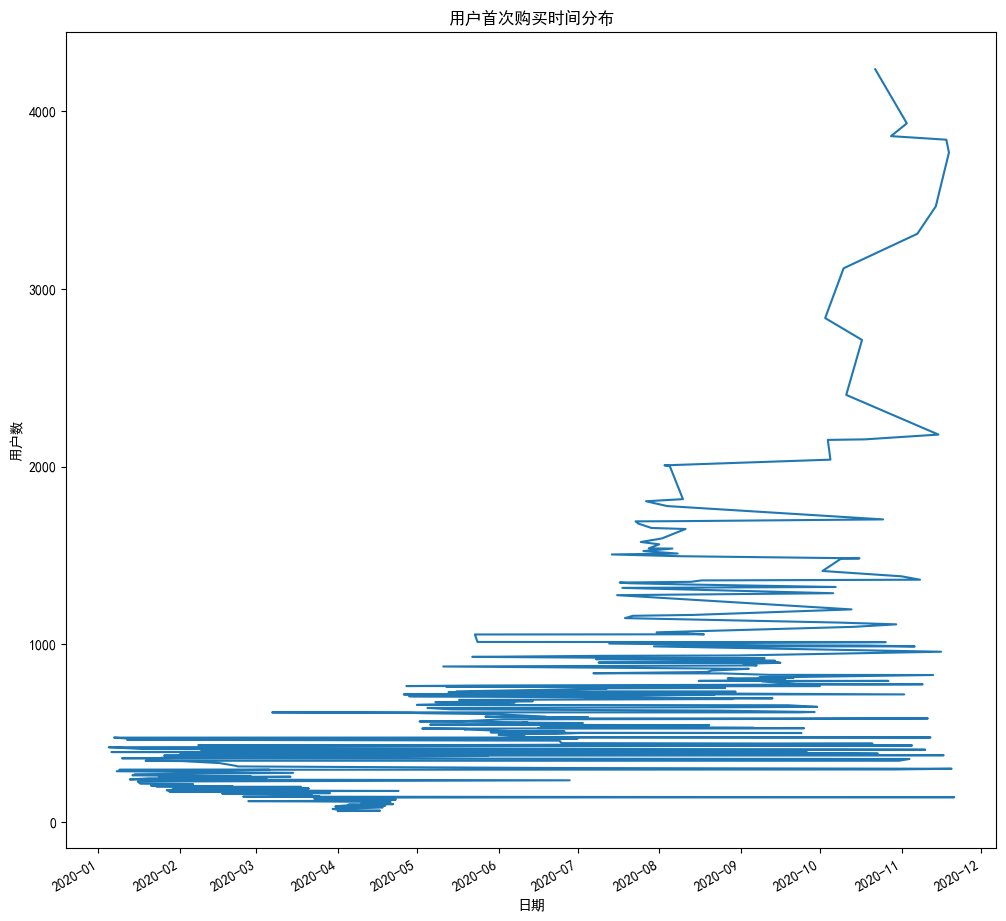

In [50]:
data=df_puraches.groupby('user_id').day.agg(['max','min']).reset_index()
data['min'].value_counts().plot(figsize=(12,12),
                                title='用户首次购买时间分布',
                                xlabel='日期',
                                ylabel='用户数')


<Axes: title={'center': '用户最近购买时间分布'}, xlabel='日期', ylabel='用户数'>

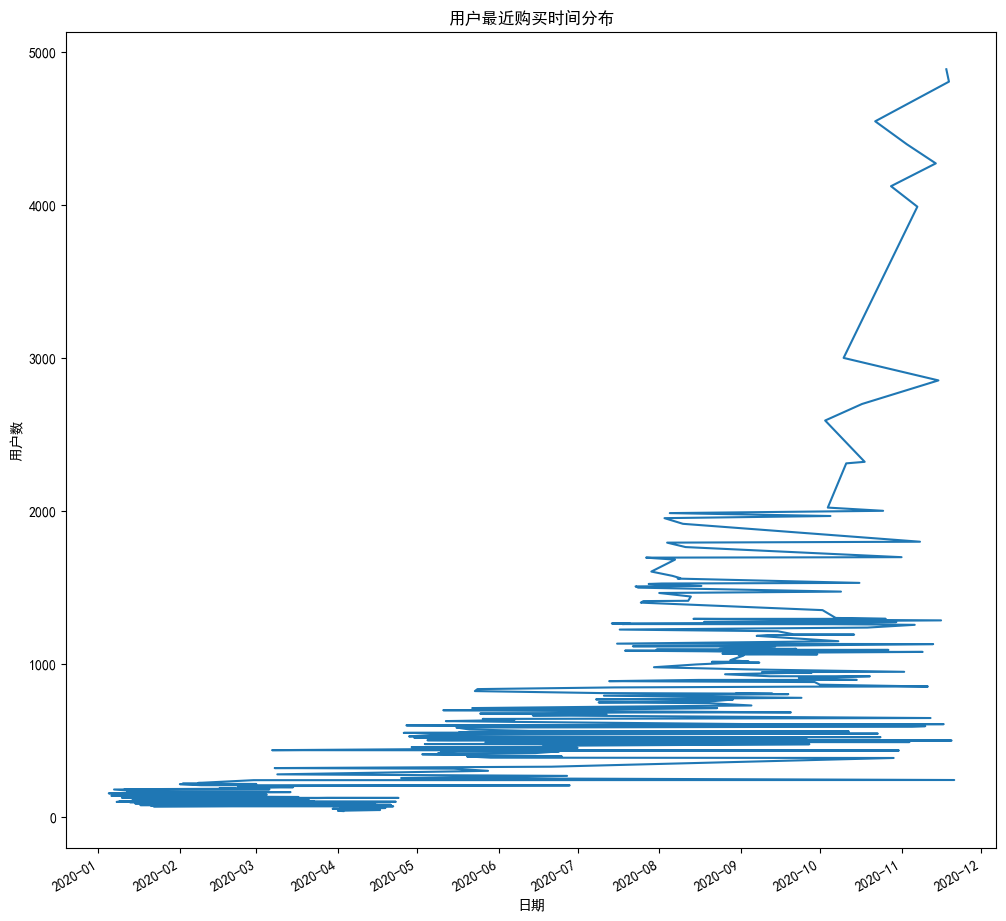

In [57]:
data['max'].value_counts().plot(figsize=(12,12),
                                title='用户最近购买时间分布',
                                xlabel='日期',
                                ylabel='用户数')

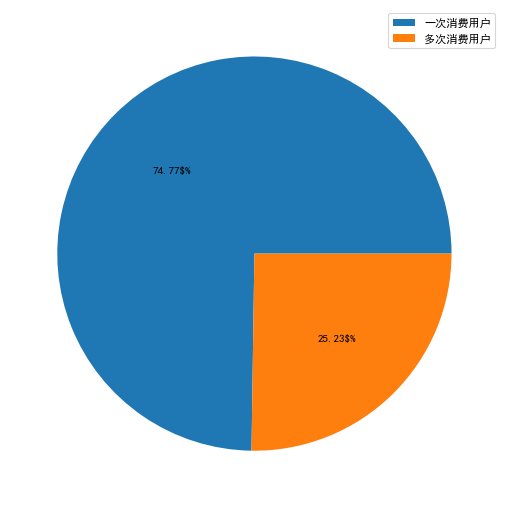

In [58]:
#########首次购买和 最近购买时间的 趋势差不多 无法分别##########
########下面计算多次消费，和一次消费用户占比

#percent=(data['min']==data['max']).value_counts.values
#percent.type()###代码注释： 当首次购买=最后一次购买时 为一次消费用户，反之不相等时为多次消费用户，但value_counts默认倒叙排列，大的数在前，无法区分是那个是一次还是多次
###.values 返回numpy数组【1200,200】
single_time=(data['min']==data['max']).sum() 
mutiple_time=len(data)-single_time
percent=[single_time/len(data),mutiple_time/len(data)]
plt.figure(figsize=(8,8),dpi=80)
plt.pie(percent,autopct='%.2f$%%')
plt.legend(['一次消费用户','多次消费用户'])

In [59]:
"""可以看到一次消费与多次消费的比重为3:1， 用户多次消费的比例并不高，也就是说：大多用户购买一次后，不再购买，忠诚度偏低，
前面看到了 消耗了大量运营成本来引流 获客成本较高，但是转化率， 多次转化率偏低"""

'可以看到一次消费与多次消费的比重为3:1， 用户多次消费的比例并不高，也就是说：大多用户购买一次后，不再购买，忠诚度偏低，\n前面看到了 消耗了大量运营成本来引流 获客成本较高，但是转化率， 多次转化率偏低'

In [62]:
########################用户分类表 --df#######################
df_pur=df_puraches[df_puraches.user_id!='unkown'].pivot_table(index='user_id',
                                                             columns='Month',
                                                             values='event_time',
                                                             aggfunc='count').fillna(0)
df_pur####用户分类的大表，只有基础数据 即每个用户id 在每天都访问次数#####

Month,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
user_id,,,,,,,,,,,
1515915625439952115,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1515915625440038436,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
1515915625440051468,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,10.00
1515915625440099873,0.00,0.00,0.00,0.00,3.00,1.00,2.00,0.00,5.00,10.00,2.00
1515915625440121544,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1515915625514887850,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1515915625514888605,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
1515915625514888682,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [63]:

def active_judge(x):
    """用户分类函数
                unreg：未注册用户，无购买历史且本月未购买
                
                unactive：未活跃用户，有购买历史，本月未购买，
                
                new:第一次购买的新用户。
    
                active：活跃用户，指本月购买且上月购买，
                
                return：回流用户，有购买历史，本月购买且上月未购买，
                     
    """    
    labels = []
    for i in range(11):  # 遍历11个月的数据
        if x[i] == 0:  # 本月无购买
            if len(labels) > 0:  # 不是第一个月
                if labels[i-1] == 'unreg':
                    labels.append('unreg')
                else:
                    labels.append('unactive')
            else:  # 第一个月
                labels.append('unreg')
        else:  # 本月有购买
            if len(labels) == 0:  # 第一个月
                labels.append('new')
            else:  # 不是第一个月
                if labels[i-1] == 'unactive':
                    labels.append('return')
                elif labels[i-1] == 'unreg':
                    labels.append('new')
                else:
                    labels.append('active')
    return pd.Series(labels, df_pur.columns)

In [64]:
purchase_labels=df_pur.apply(active_judge,axis=1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\591210376.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i]==0:


In [65]:
purchase_labels.head()

###########用户分类标签表##################################

Month,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
user_id,,,,,,,,,,,
1515915625439952115,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive
1515915625440038436,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,active,unactive
1515915625440051468,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,active
1515915625440099873,unreg,unreg,unreg,unreg,new,active,active,unactive,return,active,active
1515915625440121544,unreg,unreg,unreg,unreg,new,unactive,return,unactive,unactive,unactive,unactive


In [66]:
purchase_ct=purchase_labels.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
###1.首先把unreg 换成np.NaN空值，变成可以计算聚合的值
###疑问：为什么能分成4个用户分类维度的呢，是哪一步完成的
###答： value_counts 的作用：它会统计每个唯一值的出现次数，因此会为每个有效标签（如 new, unactive 等）生成一个计数。
purchase_ct

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\1307512406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_ct=purchase_labels.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\1307512406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_ct=purchase_labels.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\1307512406.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  purchase_ct=purchase_labels.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\1307512406.py:1: FutureWarning: pandas.value_counts is deprecated and will be r

Month,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
active,NaN,1977.00,2004,861,1327,3944,3612,6125,5596,3832,5129
new,7948.00,7238.00,6565,6393,20374,15594,34103,36591,22042,46147,30580
return,NaN,NaN,831,619,2562,3101,2976,4876,5977,3860,3189
unactive,NaN,5971.00,12351,20271,24255,41473,57524,87214,123233,149156,194677


In [69]:
purchase_ct=purchase_ct.fillna(0).T ####填充空值在行列转置
purchase_ct

,active,new,return,unactive
Month,,,,
2020-01-01,0.00,7948.00,0.00,0.00
2020-02-01,1977.00,7238.00,0.00,5971.00
2020-03-01,2004.00,6565.00,831.00,12351.00
2020-04-01,861.00,6393.00,619.00,20271.00
2020-05-01,1327.00,20374.00,2562.00,24255.00
2020-06-01,3944.00,15594.00,3101.00,41473.00
2020-07-01,3612.00,34103.00,2976.00,57524.00
2020-08-01,6125.00,36591.00,4876.00,87214.00
2020-09-01,5596.00,22042.00,5977.00,123233.00


<Axes: xlabel='Month'>

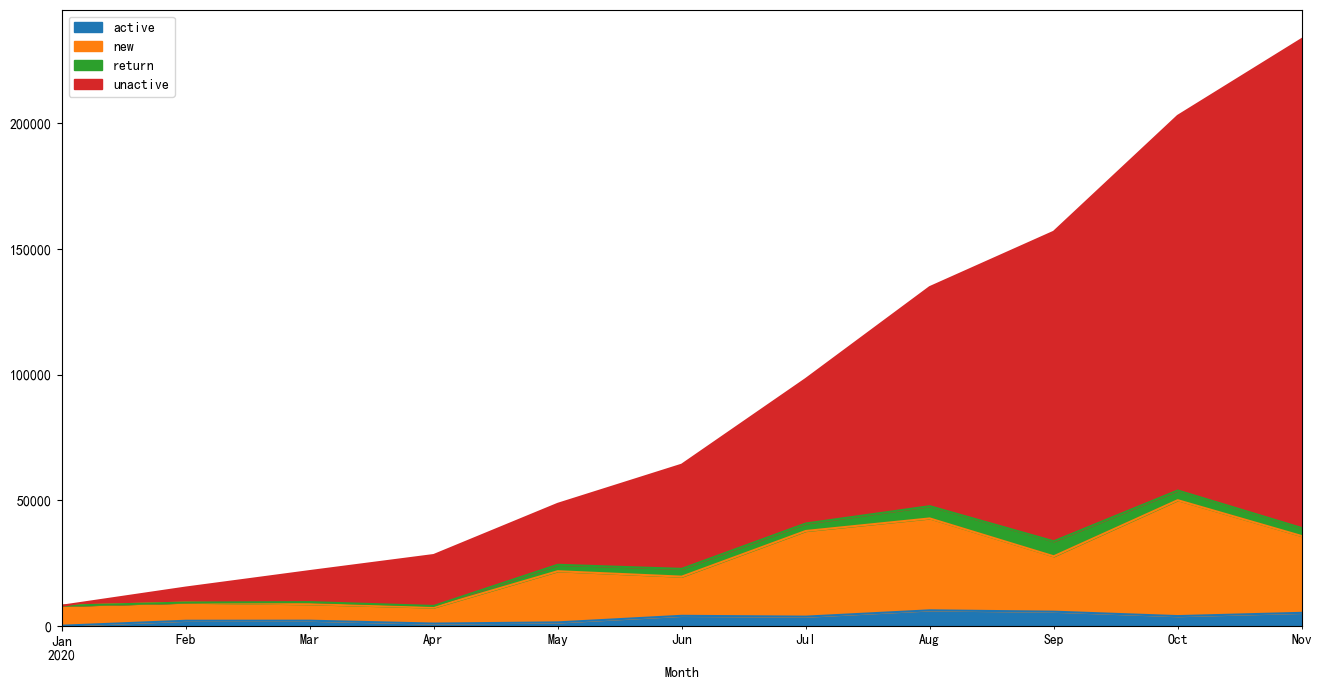

In [70]:
purchase_ct.plot.area(figsize=(16,8))

In [72]:
purchase_ct.apply(lambda x:x/x.sum(),axis=1) 
####计算各个用户分类的占比   axis=1 按行 也就是月单位 计算各类用户的占比
####默认axis=0 为列

,active,new,return,unactive
Month,,,,
2020-01-01,0.00,1.00,0.00,0.00
2020-02-01,0.13,0.48,0.00,0.39
2020-03-01,0.09,0.30,0.04,0.57
2020-04-01,0.03,0.23,0.02,0.72
2020-05-01,0.03,0.42,0.05,0.50
2020-06-01,0.06,0.24,0.05,0.65
2020-07-01,0.04,0.35,0.03,0.59
2020-08-01,0.05,0.27,0.04,0.65
2020-09-01,0.04,0.14,0.04,0.79


<Axes: xlabel='Month'>

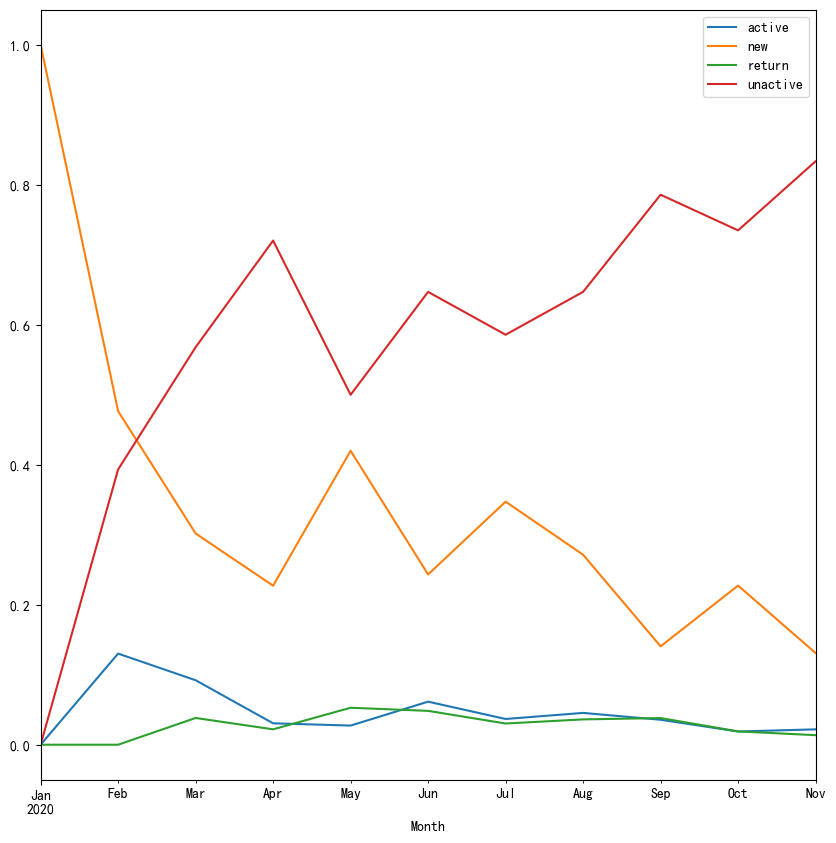

In [73]:
purchase_ct.apply(lambda x:x/x.sum(),axis=1).plot(figsize=(10,10))

In [74]:
""" 从用户分类图可以看出，非活跃用户不断走高，流量推高。而回归return用户和active活跃用户没有明显的改善，基本盘较为平稳，
    1-4月 新用户较多 说明运营的获客渠道、方式、手段效果显著，
    但同时 流失用户也陡然增加，转化率不高，  
    
    所以当误之急为 如何提高用户的忠诚度，引到持续消费"""

' 从用户分类图可以看出，非活跃用户不断走高，流量推高。而回归return用户和active活跃用户没有明显的改善，基本盘较为平稳，\n    1-4月 新用户较多 说明运营的获客渠道、方式、手段效果显著，\n    但同时 流失用户也陡然增加，转化率不高，  \n    \n    所以当误之急为 如何提高用户的忠诚度，引到持续消费'

In [75]:
################################用户的生命周期###############################

In [78]:
data=df_puraches[df_puraches.user_id!='unkown'].groupby('user_id').day.agg(['max','min']).reset_index()
data
#############最近消费时间-首次消费时间=用户生命周期(max-min)

,user_id,max,min
0,1515915625439952115,2020-07-09,2020-07-09
1,1515915625440038436,2020-10-28,2020-09-22
2,1515915625440051468,2020-11-16,2020-10-21
3,1515915625440099873,2020-11-08,2020-05-12
4,1515915625440121544,2020-07-14,2020-05-16
...,...,...,...
233570,1515915625514887850,2020-11-21,2020-11-21
233571,1515915625514888605,2020-11-21,2020-11-21
233572,1515915625514888682,2020-11-21,2020-11-21
233573,1515915625514890922,2020-11-21,2020-11-21


In [80]:
(data['max']-data['min']).describe()
####大部分0和1，最大值为319  一柱擎天图

count               233575
mean      16 days 15:00:20
std       46 days 04:13:45
min        0 days 00:00:00
25%        0 days 00:00:00
50%        0 days 00:00:00
75%        1 days 00:00:00
max      319 days 00:00:00
dtype: object

<bound method NDFrame.describe of 0          0.00
1         36.00
2         26.00
3        180.00
4         59.00
          ...  
233570     0.00
233571     0.00
233572     0.00
233573     0.00
233574     0.00
Length: 233575, dtype: float64>

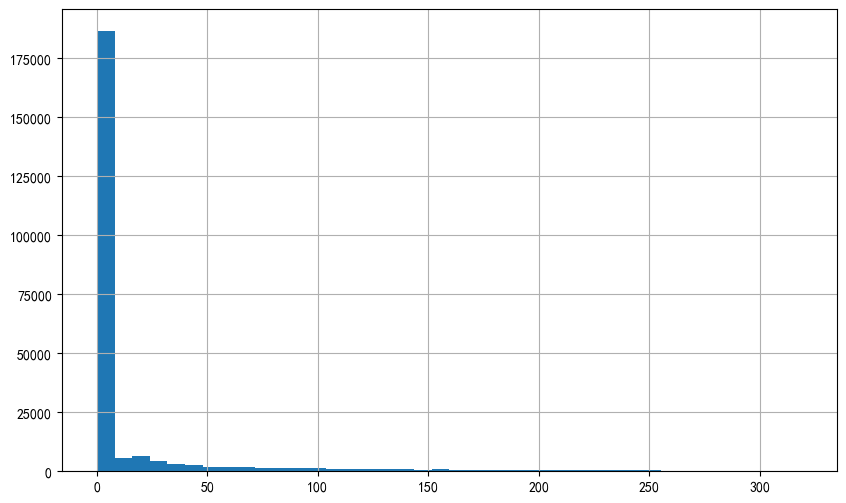

In [84]:
((data['max']-data['min'])/np.timedelta64(1,'D')).hist(bins=40,figsize=(10,6))  
##############除以np.timedelta64(1,'D') 是为了将上面的dtype：object变为以天为单位的浮点数float64 方便绘制图像
#######消费周期的均值=16天
((data['max']-data['min'])/np.timedelta64(1,'D')).describe

<Axes: >

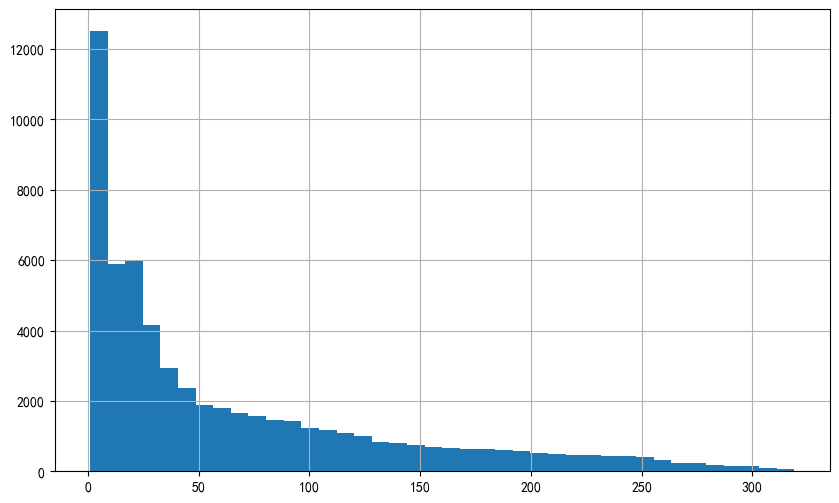

In [86]:
data_1=(data['max']-data['min']).reset_index()[0]/np.timedelta64(1,'D')
#查看排除仅一次消费的用户的数据 
data_1[data_1 > 0].hist(bins=40,figsize=(10,6))  

In [87]:
data_1[data_1 > 0].describe()

count   58942.00
mean       65.88
std        72.14
min         1.00
25%        13.00
50%        35.00
75%       100.00
max       319.00
Name: 0, dtype: float64

In [88]:
"""在排除仅一次消费的用户的数据后：
                        1.可以看到用户的生命周期大幅提高有16天 提高到了65天
                        2.若能成功挽留用户 将大大提升用户生命周期
                        3.15天是一个关键点， 应加强用户的关怀，引导消费，以延长生命周期
                        4.再次验证了用户留存 做到不好

"""

'在排除仅一次消费的用户的数据后：\n                        1.可以看到用户的生命周期大幅提高有16天 提高到了65天\n                        2.若能成功挽留用户 将大大提升用户生命周期\n                        3.15天是一个关键点， 应加强用户的关怀，引导消费，以延长生命周期\n                        4.再次验证了用户留存 做到不好\n\n'

In [90]:
#####################用户的复购率和回购率分析#####################################
#复购率：在某个时间周期period内， 多次购买的用户   占比/ 全用户
#回购率：在某个时间周期period内， 有过消费的用户且在下个周期内也消费的用户 占比 /全用户
##设定 多次消费=1  1次消费=0， 无消费=NAN
df_r=df_pur.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
##applymap和apply一样 但对每个元素进行操作。  apply可以指定axis 行列
df_r.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\1055897472.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_r=df_pur.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)


Month,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01
user_id,,,,,,,,,,,
1515915625439952115,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1515915625440038436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN
1515915625440051468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
1515915625440099873,NaN,NaN,NaN,NaN,1.00,0.00,1.00,NaN,1.00,1.00,1.00
1515915625440121544,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN


<Axes: xlabel='Month'>

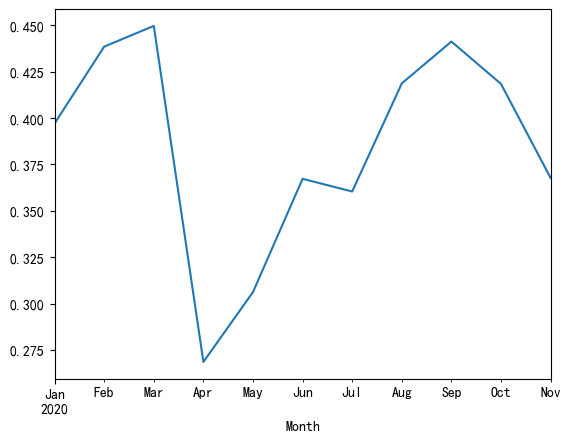

In [91]:
(df_r.sum()/df_r.count()).plot()
#########每个月的多次消费用户/总用户  = 复购率
""" 4月的复购率最低，而其他月份处于高位， 说明老用户的消费能力和消费欲望强大，
只要做好留存 ，  销售额必然提升"""

In [112]:
def repurchasing(x):
    labels = []
    for i in range(10):  # 遍历前10个月
        if x[i] == 1:  # 如果本月有复购（多次购买）
            if x[i+1] == 1:  # 下个月也有复购
                labels.append(1)
            if x[i+1] == 0:  # 下个月只有单次购买
                labels.append(0)
            else:  # 下个月没有购买
                labels.append(np.NaN)
    labels.append(np.NaN)  # 最后一个月的标记
    return pd.Series(labels, df_pur.columns)

In [113]:
purchase = df_pur.applymap(lambda x:1 if x>0 else 0)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\2416006665.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  purchase = df_pur.applymap(lambda x:1 if x>0 else 0)


In [97]:
df_re = purchase.apply(repurchasing,axis=1)
df_re.head(5)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\2238046824.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i]==1:
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\2238046824.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i+1]==1:
C:\Users\lenovo\AppData\Local\Temp\ipykernel_16956\2238046824.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[i+1]==0:


ValueError: Length of values (2) does not match length of index (11)

In [100]:
###############################################################用户RFM 模型#####################################
#R:最近一次消费 (Recency)
#F:消费频率 (Frequency)(本例中用购买产品数量代替)
#M:消费金额 (Monetary)

In [105]:
rfm = df[df.user_id!='unkown'].pivot_table(index='user_id',
                                           values=['price','event_time','day'],
                                           aggfunc={'price':'sum',
                                                    'event_time':'count',
                                                    'day':'max'})
rfm

,day,event_time,price
user_id,,,
1515915625439952115,2020-07-09,1,416.64
1515915625440038436,2020-10-28,2,56.43
1515915625440051468,2020-11-16,14,7530.34
1515915625440099873,2020-11-08,23,4935.60
1515915625440121544,2020-07-14,2,182.83
...,...,...,...
1515915625514887850,2020-11-21,1,3472.20
1515915625514888605,2020-11-21,2,277.74
1515915625514888682,2020-11-21,1,474.75


In [108]:
rfm['R']=-(rfm.day-rfm.day.max())/np.timedelta64(1,'D')
rfm.rename(columns={'event_time':'F','price':'M'},inplace=True)
rfm.head()

,day,F,M,R
user_id,,,,
1515915625439952115,2020-07-09,1,416.64,135.00
1515915625440038436,2020-10-28,2,56.43,24.00
1515915625440051468,2020-11-16,14,7530.34,5.00
1515915625440099873,2020-11-08,23,4935.60,13.00
1515915625440121544,2020-07-14,2,182.83,130.00


In [114]:
########对用户打标签####
## 有Money price就是   最重要的维度  区分：重要客户或 一般客户
## 有 R周期短=粘性高      R是在重要维度下区分 ：保持挽留  或者  价值发展
## 有 F频率高  现金流高----要保持
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    label=level.R+level.F+level.M
    d={
        '111':'重要价值客户',
        '101':'重要发展用户',
        '011':'重要保持用户',
        '001':'重要挽留客户',
        '110':'一般价值客户',
        '100':'一般挽留客户',
        '010':'一般保持客户',
        '000':'一般发展客户'
    }
    result=d[label]
    return result


In [116]:
rfm['label']=rfm[['R','F','M']].apply(lambda x: x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

,day,F,M,R,label
user_id,,,,,
1515915625439952115,2020-07-09,1,416.64,135.00,一般挽留客户
1515915625440038436,2020-10-28,2,56.43,24.00,一般发展客户
1515915625440051468,2020-11-16,14,7530.34,5.00,重要保持用户
1515915625440099873,2020-11-08,23,4935.60,13.00,重要保持用户
1515915625440121544,2020-07-14,2,182.83,130.00,一般挽留客户


In [117]:
temp=rfm.label.value_counts()
rfm.groupby('label').size()

label
一般价值客户    10002
一般保持客户    15968
一般发展客户    71904
一般挽留客户    69910
重要价值客户    13213
重要保持用户    21912
重要发展用户    15128
重要挽留客户    15538
dtype: int64

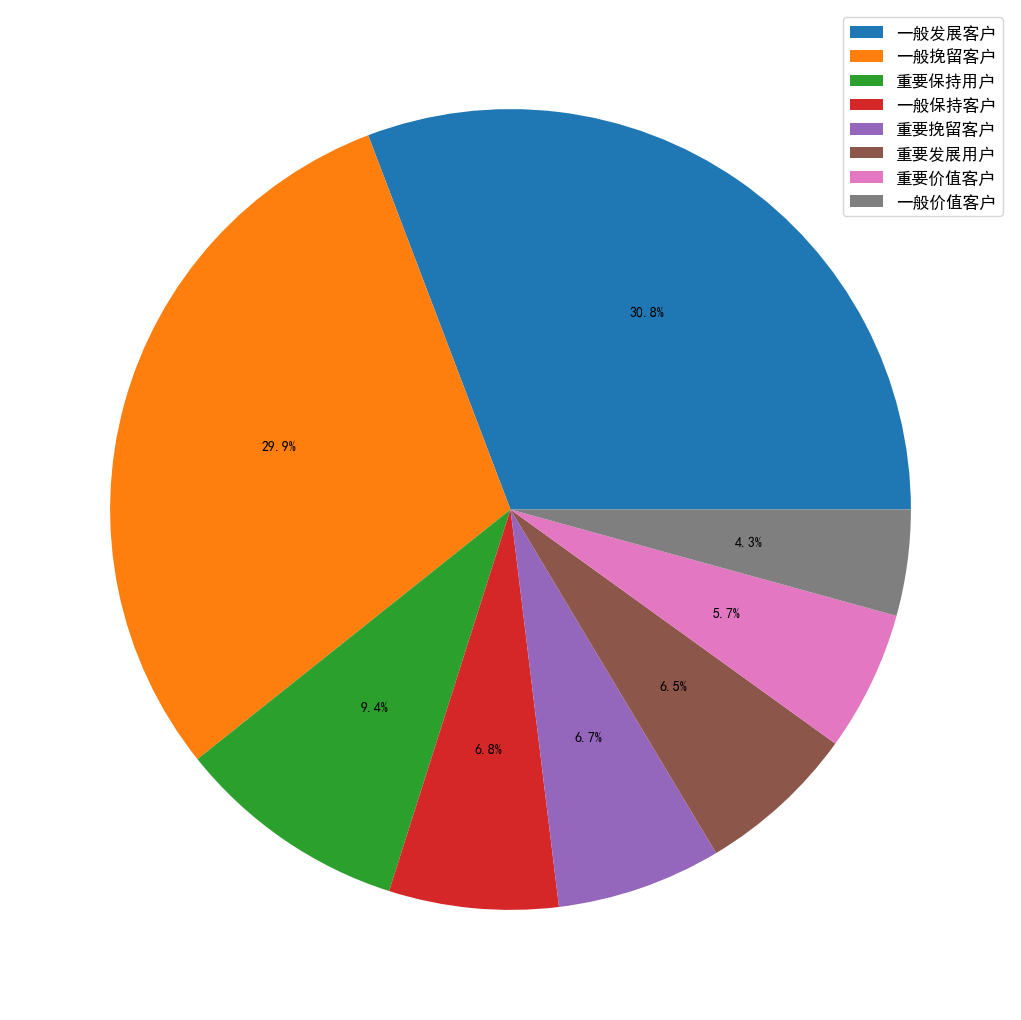

In [118]:
plt.figure(figsize = (13,13))
plt.pie(temp,autopct='%.1f%%')
plt.legend(temp.index,fontsize = 12)
plt.show()

In [119]:
"""最一般的 一般发展和挽留占比最高 都近30%， 共60%

"""
#####各类别用户的消费金额M、购买产品数量 F 的贡献进行比较

'最一般的 一般发展和挽留占比最高 都近30%， 共60%\n\n'

In [129]:


temp1=rfm.groupby('label')['M'].sum()
temp2=rfm.groupby('label')['F'].sum()
##### 按标签 也就是按客户分类 分组，  ['M/F']只选择M或者F列 对这一列进行sum聚合


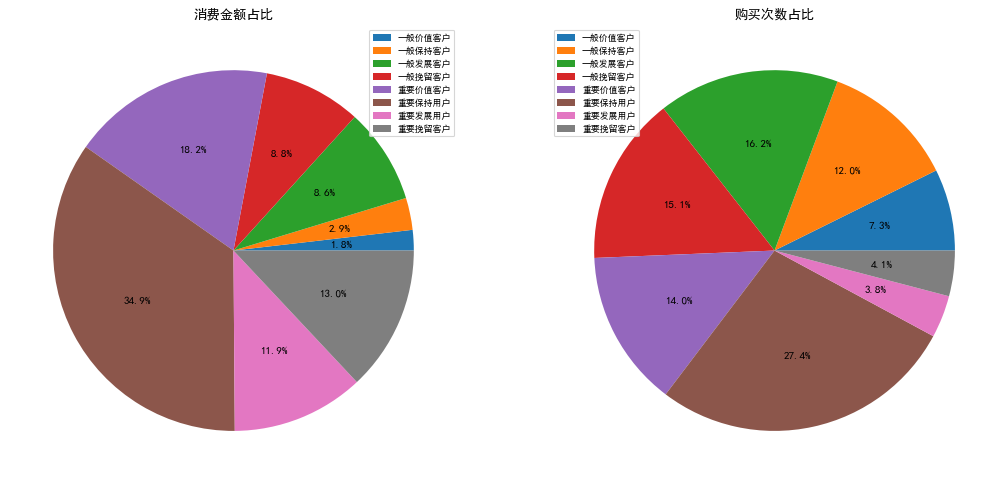

In [130]:
plt.figure(figsize=(16,16),dpi=80)
plt.subplot(121)
plt.pie(temp1,autopct='%.1f%%')
plt.title('消费金额占比')
plt.legend(temp1.index,fontsize = 8)
plt.subplot(122)
plt.pie(temp2,autopct='%.1f%%')
plt.title('购买次数占比')
plt.legend(temp2.index,fontsize = 8)
plt.show()

In [ ]:
"""
重要保持客户 之所以重要的原因（棕色 基本盘？）： 消费金额和消费频率的占比都非常大  但其人数占比只有6.5%左右,验证了二八定律
反之看一般挽留和保持用户， 人数占比共60% 但总消费金额 共只占4.7%， 消费次数提供的现金流占20% ，价值极低
"""